In [89]:
# most of datasets are not in normal distribution(NM) form, and NM make its easy for calculation, prediction, etc.
# NM is the most wanted and familier distribution for any data analyst
# now we are going to apply different transformation to bring our dataset close to NM distribution without degrading its original pred score:

In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df=df[['Survived','Age','Fare']]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
df.isnull().sum()
# there are null value in age

Survived      0
Age         177
Fare          0
dtype: int64

In [63]:
# lets replace them with mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [64]:
# now lets split for train test: 
x=df.iloc[:,1:]
y=df.iloc[:,0]
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

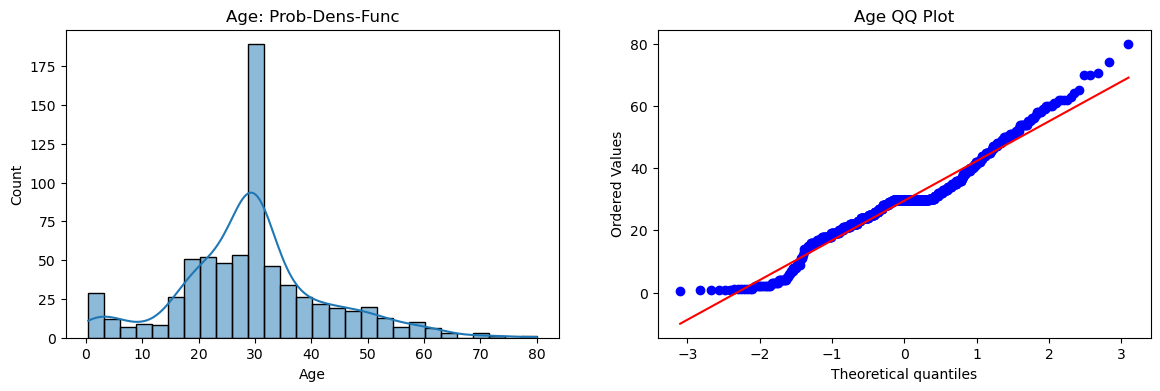

In [67]:
# the right side also shows normal distribution in different way:
plt.figure(figsize = (14,4))
plt.subplot(121)
# sns.distplot(x_train['Age'])
sns.histplot(x_train['Age'],kde=True)
plt.title('Age: Prob-Dens-Func')

plt.subplot(122)
stats.probplot(x_train['Age'], dist ='norm',plot= plt)
plt.title('Age QQ Plot')

plt.show()
# these are the original distribution before transformation for age

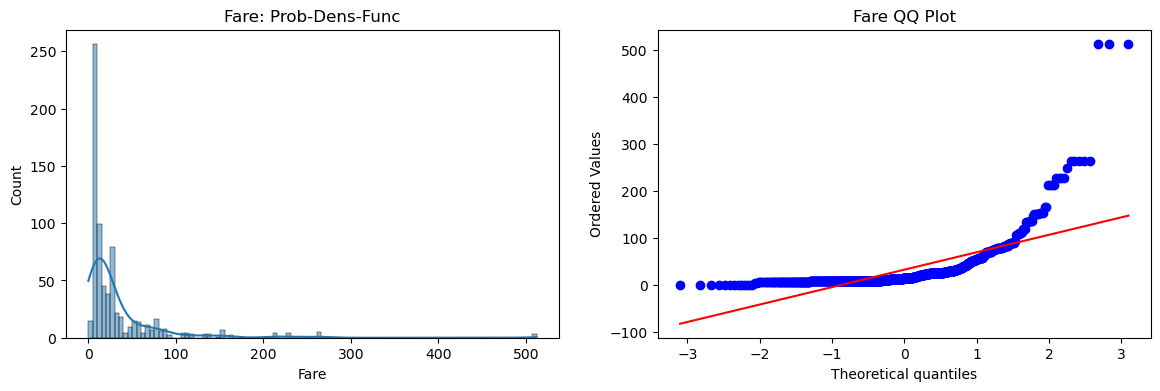

In [68]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare: Prob-Dens-Func')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist ='norm',plot= plt)
plt.title('Fare QQ Plot')

plt.show()
# these are the original distribution before transformation for Fare

In [69]:
# lets import two model to check the improvement in prediction after and before transformation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score

In [71]:
clf.fit(x_train, y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy for LR:',accuracy_score(y_test,y_pred))
print('Accuracy for DT:', accuracy_score(y_test,y_pred))

# the accuracy befor transform for logistic and decisiointree classifier:

Accuracy for LR: 0.6480446927374302
Accuracy for DT: 0.6480446927374302


In [72]:
from sklearn.preprocessing import FunctionTransformer

In [73]:
# we are using log transform here:

trf = FunctionTransformer(func = np.log1p)

# log1p for if some values are 0, (it add 1 then calculate for each):

In [74]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [75]:
# now after transforming lets check the score:

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print('Accuracy for LR:',accuracy_score(y_test,y_pred))
print('Accuracy for DT:', accuracy_score(y_test,y_pred))

# the accuracy after log transform for logistic and decisiointree classifier:
# there is improvements:

Accuracy for LR: 0.6815642458100558
Accuracy for DT: 0.6815642458100558


In [76]:
# now we cant be sure if prediction after transform is right or not so lets apply cross validation score technique:

from sklearn.model_selection import cross_val_score

In [77]:
x_transformed = trf.fit_transform(x)

print("LR:",np.mean(cross_val_score(clf,x_transformed,y,scoring = 'accuracy',cv=10)))
print("DT:",np.mean(cross_val_score(clf2,x_transformed,y,scoring = 'accuracy',cv=10)))
# there is not much difference in logistic:

LR: 0.678027465667915
DT: 0.66


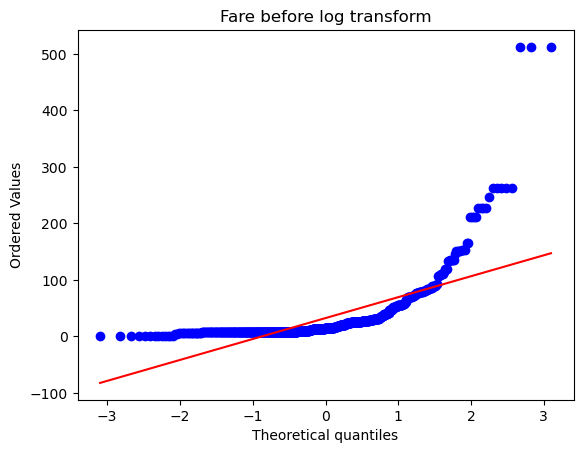

In [78]:
# now lets see it through graph

# plt.figure(figsize=(14,4))

# plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before log transform')

plt.show()

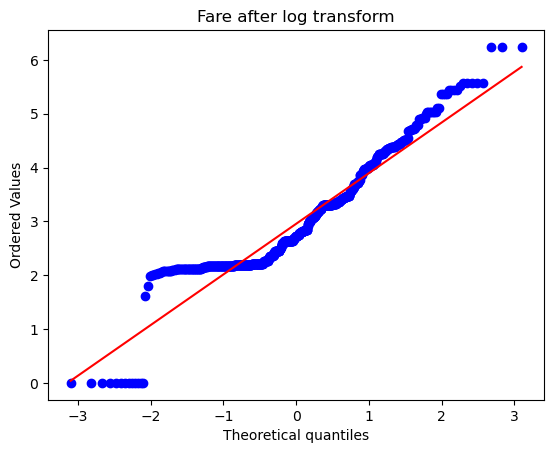

In [79]:
# plt.subplot(121)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log transform')

plt.show()

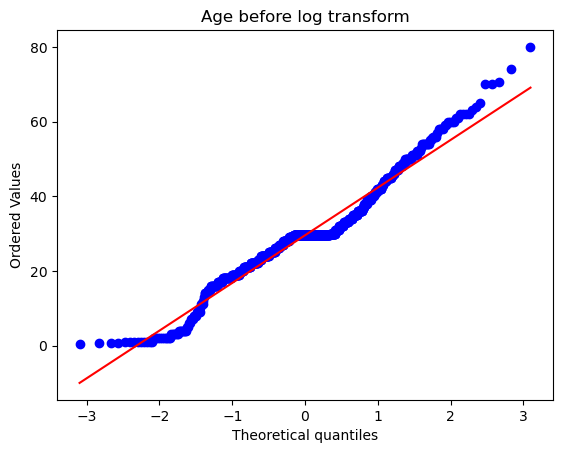

In [80]:
# similarly for age:
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age before log transform')

plt.show()

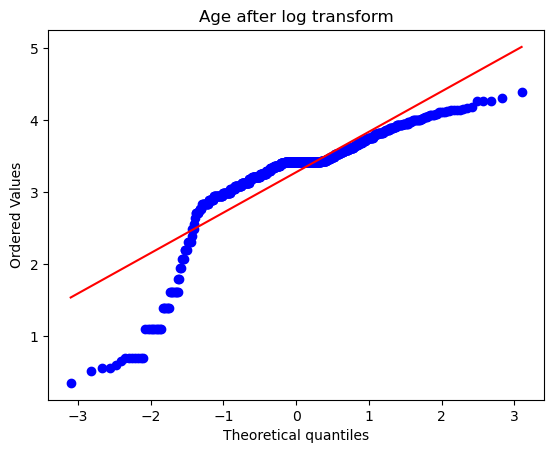

In [81]:
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after log transform')

plt.show()

In [84]:
# now lets apply column transformer:
from sklearn.compose import ColumnTransformer

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [86]:
clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print('Accuracy for LR:',accuracy_score(y_test,y_pred))
print('Accuracy for DT:', accuracy_score(y_test,y_pred2))

Accuracy for LR: 0.6703910614525139
Accuracy for DT: 0.6759776536312849


In [88]:
x_transformed2 = trf2.fit_transform(x)

print("LR:",np.mean(cross_val_score(clf,x_transformed2,y,scoring = 'accuracy',cv=10)))
print("DT:",np.mean(cross_val_score(clf2,x_transformed2,y,scoring = 'accuracy',cv=10)))

LR: 0.6712609238451936
DT: 0.6621847690387016
